In [ ]:
import random
import numpy as np
def walk_probability(pheromone, distance, start, end, alpha, beta, walked_state=[]):  ##計算轉移機率
  denominator = 0
  for i in range(len(pheromone)):
    if start == i or i in walked_state:
      continue
    denominator += pheromone[start,i]**alpha*distance[start,i]**(-beta)
  return (pheromone[start, end]**alpha * distance[start, end]**(-beta))/denominator

def choose_next_state(pheromone, distance, start, alpha, beta, walked_state=[], q0 = None):  ##找到下一個state
  r = random.uniform(0,1)
  q = random.uniform(0,1)
  probability = []
  for i in range(len(pheromone)):
    if start != i and i not in walked_state:
      probability.append(walk_probability(pheromone, distance, start, i, alpha, beta, walked_state))
  all_state = [x for x in range(len(pheromone))]
  possible_state = [item for item in all_state if item not in walked_state]
  if q0:
    if q < q0:
      return possible_state[np.argmin(probability)]
  for i in range(len(probability)):
    r -= probability[i]
    if r <0:
      return possible_state[i]

In [ ]:
import numpy as np
distance  = np.zeros((51,51))
coordinate = open(r'/content/drive/My Drive/Colab Notebooks/cities_coordinate.txt')  ##讀取位置信息
cities_coordinate = []
for line in coordinate:
  city_nuber, city_x, city_y =  line.split(" ")
  cities_coordinate.append([int(city_x), int(city_y)])
for i in range(len(cities_coordinate)):
  for j in range(len(cities_coordinate)):
    distance[i,j] = ((cities_coordinate[i][0]-cities_coordinate[j][0])**2+(cities_coordinate[i][1]-cities_coordinate[j][1])**2)**0.5  ##計算距離矩陣

999 iteration: the shortest distance: 446.5212766880397


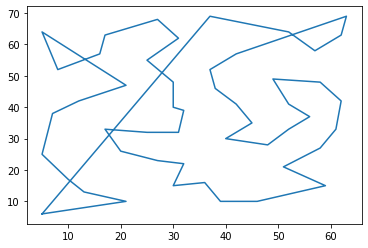

In [ ]:
from google.colab import output
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math

ant_number = 51  ##螞蟻數量
pheromone_decay = 0.1  ##信息素的衰退速率
iteration = 100  ##最大迭代次數
alpha = 1  ##信息素的重要性慘數
beta = 5  ##距離的重要性參數
shortest_distance = np.Inf  ##最短距離初始化
pheromone = np.ones((51,51))  ##信息素初始化
pheromone *= (500*51)**(-1)
counting = 0
patience = 50  ##若結果不變一定數量，則程序終止
convergence = False
anti_rate = 0
record = np.zeros((max_run, iteration), dtype='int')
for r in tqdm(range(max_run), position = 0):
  for i in range(iteration):
    delta_pheromone = np.zeros((51,51))
    ants_distance = []
    ants_path = []
    for j in range(ant_number):
      start = 0
      walked_distance = 0
      first_city = random.randint(0, len(pheromone)-1)
      walked_state = [first_city]
      for k in range(len(pheromone)-1):
        next_state = choose_next_state(pheromone, distance, start, alpha, beta, walked_state)
        walked_distance += distance[start, next_state]  ##距離計算
        walked_state.append(next_state)  ##路徑紀錄
        start = next_state
      walked_distance += distance[next_state, first_city]  ##返回初始點
      walked_state.append(first_city)
      for l in range(len(pheromone)):
        delta_pheromone[walked_state[l], walked_state[l+1]] += 1/walked_distance  ##信息素增量計算
      ants_distance.append(walked_distance)
      ants_path.append(walked_state)
    if shortest_distance > min(ants_distance):
      shortest_distance = min(ants_distance)
      shortest_path = ants_path[np.argmin(ants_distance)]
      counting = 0
    pheromone = (1-pheromone_decay) * pheromone + delta_pheromone  ##信息素更新
    counting += 1
    x = []
    y = []
    for one in shortest_path:  ##按順序紀錄位置
      x.append(cities_coordinate[one][0])
      y.append(cities_coordinate[one][1]) 
    clear_output(wait=True)
    print(i,"iteration: the shortest distance:",shortest_distance)
    record[r,i] = shortest_distance
    plt.plot(x, y)  ##繪圖
    plt.show()